<a href="https://colab.research.google.com/github/etmcrae/DDDS-Cohort-16-Projects/blob/main/Housing_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



## Problem Defition

Fill this in at the end

## Data Collection

These initial first steps import libraries and the data source for analysis.

In [13]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
#this serves as an unmodified copy of the dataframe as a backup
url_UNMODIFIED = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
df_UNMODIFIED = pd.read_csv(url_UNMODIFIED)

In [3]:
#this is the dataframe imported from the url
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
df = pd.read_csv(url)

In [5]:
#this prints the first 5 rows of the dataframe
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [17]:
#This step performs multiple valuable summaries and pulls key information to gleam
#insights into the data set for an initial look at the overview of the data.
print(df.shape)
print(type(df.shape))
print(type(df.info))
print(df.describe().columns)
print(df.describe())
print(df.info)
print(df.dtypes)


(2637, 81)
<class 'tuple'>
<class 'method'>
Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')
                PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.637000e+03  2637.000000   2188.000000    2637.000000   2637.000000   
mean   7.141301e+08    57.349261     69.166819   10044.694729      6.097459   
std    1.887527e+08    42.499091     23.356779    6742.549521 

In [19]:
#This step looks at the occurance of null values throughout the dataset by columns,
#and sorts the columns by highest percent null values.
nulls = df.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / df.shape[0] * 100 ).round(1)


,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


## Data Cleaning

In [4]:
#This step removed the 7 columns with high numbers of nulls
df.pop('Pool QC')
df.pop('Misc Feature')
df.pop('Alley')
df.pop('Fence')
df.pop('Mas Vnr Type')
df.pop('Fireplace Qu')
df.pop('Lot Frontage')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   object 
 5   Lot Shape        2637 non-null   object 
 6   Land Contour     2637 non-null   object 
 7   Utilities        2637 non-null   object 
 8   Lot Config       2637 non-null   object 
 9   Land Slope       2637 non-null   object 
 10  Neighborhood     2637 non-null   object 
 11  Condition 1      2637 non-null   object 
 12  Condition 2      2637 non-null   object 
 13  Bldg Type        2637 non-null   object 
 14  House Style      2637 non-null   object 
 15  Overall Qual     2637 non-null   int64  
 16  Overall Cond     2637 non-null   int64  
 17  Year Built    

In [5]:
#This step fills the remaining null values with zeros. Zeros are chosen so they will have minimum impact on the calculation of the values.
df = df.fillna(0)
nulls = df.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / df.shape[0] * 100 ).round(1)

,0


In [26]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,
1007100110,70,I (all),56600,Pave,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,0,1,2008,WD,Normal,103000,1
526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000,1
526302030,20,RL,11027,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1954,1954,Hip,CompShg,Wd Sdng,Wd Sdng,28.0,TA,TA,CBlock,TA,TA,No,BLQ,468.0,Rec,539.0,171.0,1178.0,GasA,Gd,Y,SBrkr,1293,0,0,1293,1.0,0.0,2,0,2,1,TA,5,Typ,0,Attchd,1954.0,RFn,2.0,452.0,TA,TA,Y,280,0,0,0,0,0,0,5,2006,WD,Normal,149900,1
526302110,20,RL,13008,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1956,1956,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Fa,Fa,No,Rec,564.0,Unf,0.0,318.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1956.0,Unf,1.0,502.0,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,124500,1
526302120,20,RL,11765,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,302.0,TA,TA,CBlock,TA,TA,Mn,Rec,1127.0,Unf,0.0,490.0,1617.0,GasA,Fa,Y,SBrkr,1797,0,0,1797,0.0,0.0,1,1,3,1,TA,7,Typ,1,Attchd,1957.0,Unf,3.0,963.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,169000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900,1
526355190,20,RL,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351.0,Rec,823.0,1043.0,2217.0,GasA,Ex,Y,SBrkr,2217,0,0,2217,1.0,0.0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2.0,621.0,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000,1
526355170,20,RL,13651,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880.0,Unf,0.0,343.0,2223.0,GasA,Ex,Y,SBrkr,2223,0,0,2223,1.0,0.0,2,0,3,1,TA,8,Typ,2,Attchd,1973.0,Fin,2.0,516.0,TA,TA,Y,300,0,0,0,0,0,0,2,2007,WD,Normal,244000,1


In [6]:
# Build a data frame to contain the metadata, using the generic name
df_info = pd.concat( [
  pd.DataFrame( [ df.isna().sum().to_dict() ], index = ["Nulls"] ).transpose().astype( { "Nulls": int } ),
  pd.DataFrame( [ df.dtypes.to_dict() ], index = [ "Data_Types"] ).transpose().astype( { "Data_Types": 'category' }),
  pd.DataFrame( [ df.memory_usage(deep=True, index = False).to_dict() ], index = ["Memory"] ).transpose(),
  df.describe( include = "all" ).transpose().astype( { "count": int } ).rename( columns = { "50%" : "median"} ),
], axis = "columns")
df_info["IRQ"] = df_info["75%"] - df_info["25%"]
df_info["range"] = df_info["max"] - df_info["min"]
df_info["sum"] = df_info["mean"] * df_info["count"]
df_info.insert( 1, "Nulls_pct" , round( df_info["Nulls"] / df_info.shape[0], 2) )

# Display some info from the meta data
print( f"Memory: { (df_info['Memory'].sum() / 1000 / 1000 ):_} MB" )
print( df_info["Data_Types"].value_counts().to_json() )
df_info.sort_values(by = ["Data_Types", "max"], ascending=[1,0])


Memory: 6.686425 MB
{"object":37,"int64":27,"float64":10}


,Nulls,Nulls_pct,Data_Types,Memory,count,unique,top,freq,mean,std,min,25%,median,75%,max,IRQ,range,sum
PID,0,0.0,int64,21096,2637,NaN,NaN,NaN,714130147.70383,188752674.750322,526301100.0,528477010.0,535453040.0,907187010.0,1007100110.0,378710000.0,480799010.0,1883161199495.0
SalePrice,0,0.0,int64,21096,2637,NaN,NaN,NaN,179986.230186,78309.251522,12789.0,129500.0,160000.0,213000.0,745000.0,83500.0,732211.0,474623689.0
Lot Area,0,0.0,int64,21096,2637,NaN,NaN,NaN,10044.694729,6742.549521,1300.0,7436.0,9450.0,11526.0,164660.0,4090.0,163360.0,26487860.0
Misc Val,0,0.0,int64,21096,2637,NaN,NaN,NaN,42.014031,393.158781,0.0,0.0,0.0,0.0,12500.0,0.0,12500.0,110791.0
Gr Liv Area,0,0.0,int64,21096,2637,NaN,NaN,NaN,1496.98521,495.209631,334.0,1128.0,1441.0,1740.0,5642.0,612.0,5308.0,3947550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Garage Qual,0,0.0,object,152202,2637,6,TA,2356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cond,0,0.0,object,152202,2637,6,TA,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paved Drive,0,0.0,object,152946,2637,3,Y,2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Type,0,0.0,object,158288,2637,10,WD,2286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_info["Data_Types"].value_counts()

,count
Data_Types,
object,37
int64,27
float64,10


In [7]:
for dt in df_info["Data_Types"].unique():
  filter = df_info["Data_Types"] == dt
  cols = df_info[ filter ].index
  df[ cols ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PID              2637 non-null   int64
 1   MS SubClass      2637 non-null   int64
 2   Lot Area         2637 non-null   int64
 3   Overall Qual     2637 non-null   int64
 4   Overall Cond     2637 non-null   int64
 5   Year Built       2637 non-null   int64
 6   Year Remod/Add   2637 non-null   int64
 7   1st Flr SF       2637 non-null   int64
 8   2nd Flr SF       2637 non-null   int64
 9   Low Qual Fin SF  2637 non-null   int64
 10  Gr Liv Area      2637 non-null   int64
 11  Full Bath        2637 non-null   int64
 12  Half Bath        2637 non-null   int64
 13  Bedroom AbvGr    2637 non-null   int64
 14  Kitchen AbvGr    2637 non-null   int64
 15  TotRms AbvGrd    2637 non-null   int64
 16  Fireplaces       2637 non-null   int64
 17  Wood Deck SF     2637 non-null   int64
 18  Open Por

In [8]:
#SHOWS YOU UNIQUE COLUMNS. SO PID PROBABLY UNIQUE IDS. OTHERS ARE COUNTABLE.
#NEED TO USE THIS TO CONVERT TO THE CORRECT DATA TYPES
filter = df_info["Data_Types"] == "int64"
cols = df_info[ filter ].index
df[ cols ].nunique().sort_values(ascending = False) / 2637 * 100


,0


In [9]:
df.pop('PID')

,PID
0,905101070
1,905101330
2,903454090
3,533244030
4,909252020
...,...
2632,903231070
2633,906201021
2634,533253070
2635,527376100


## Exploratory Data Analysis

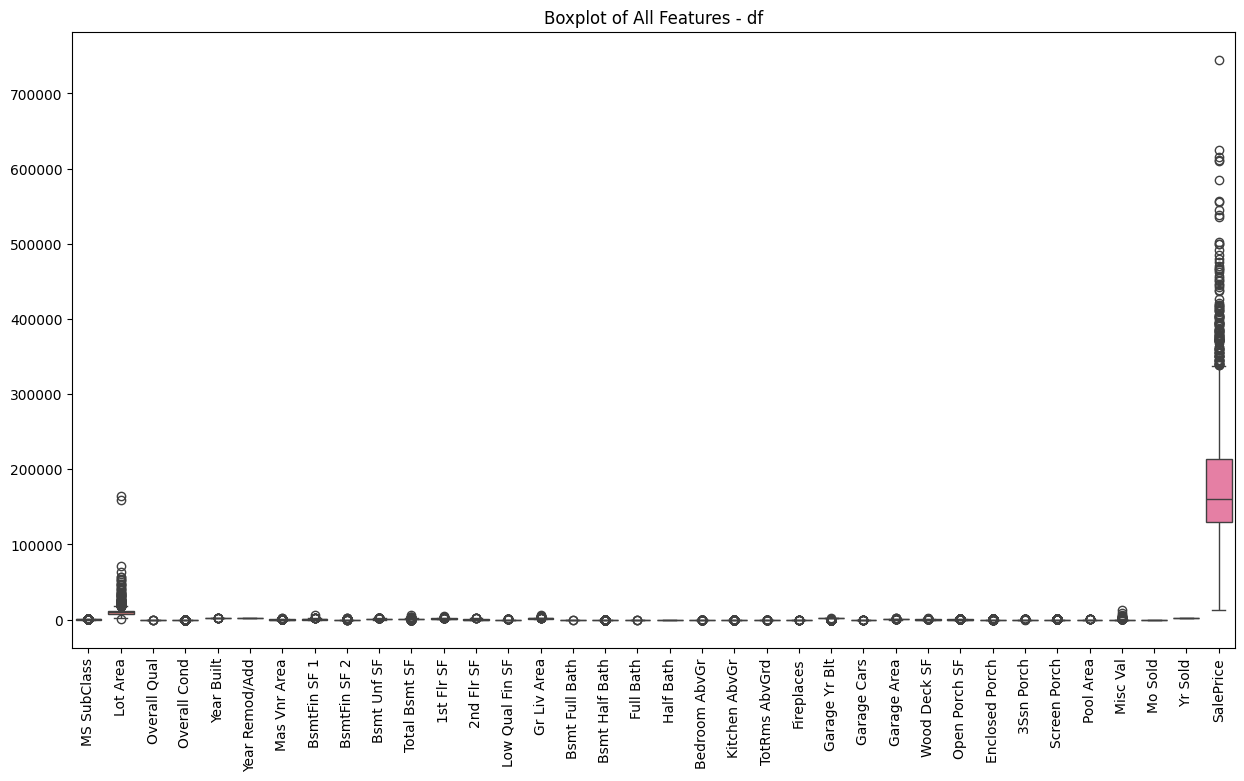

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Boxplot of All Features - df")
plt.savefig('box-whiskers-df.png')
plt.show()

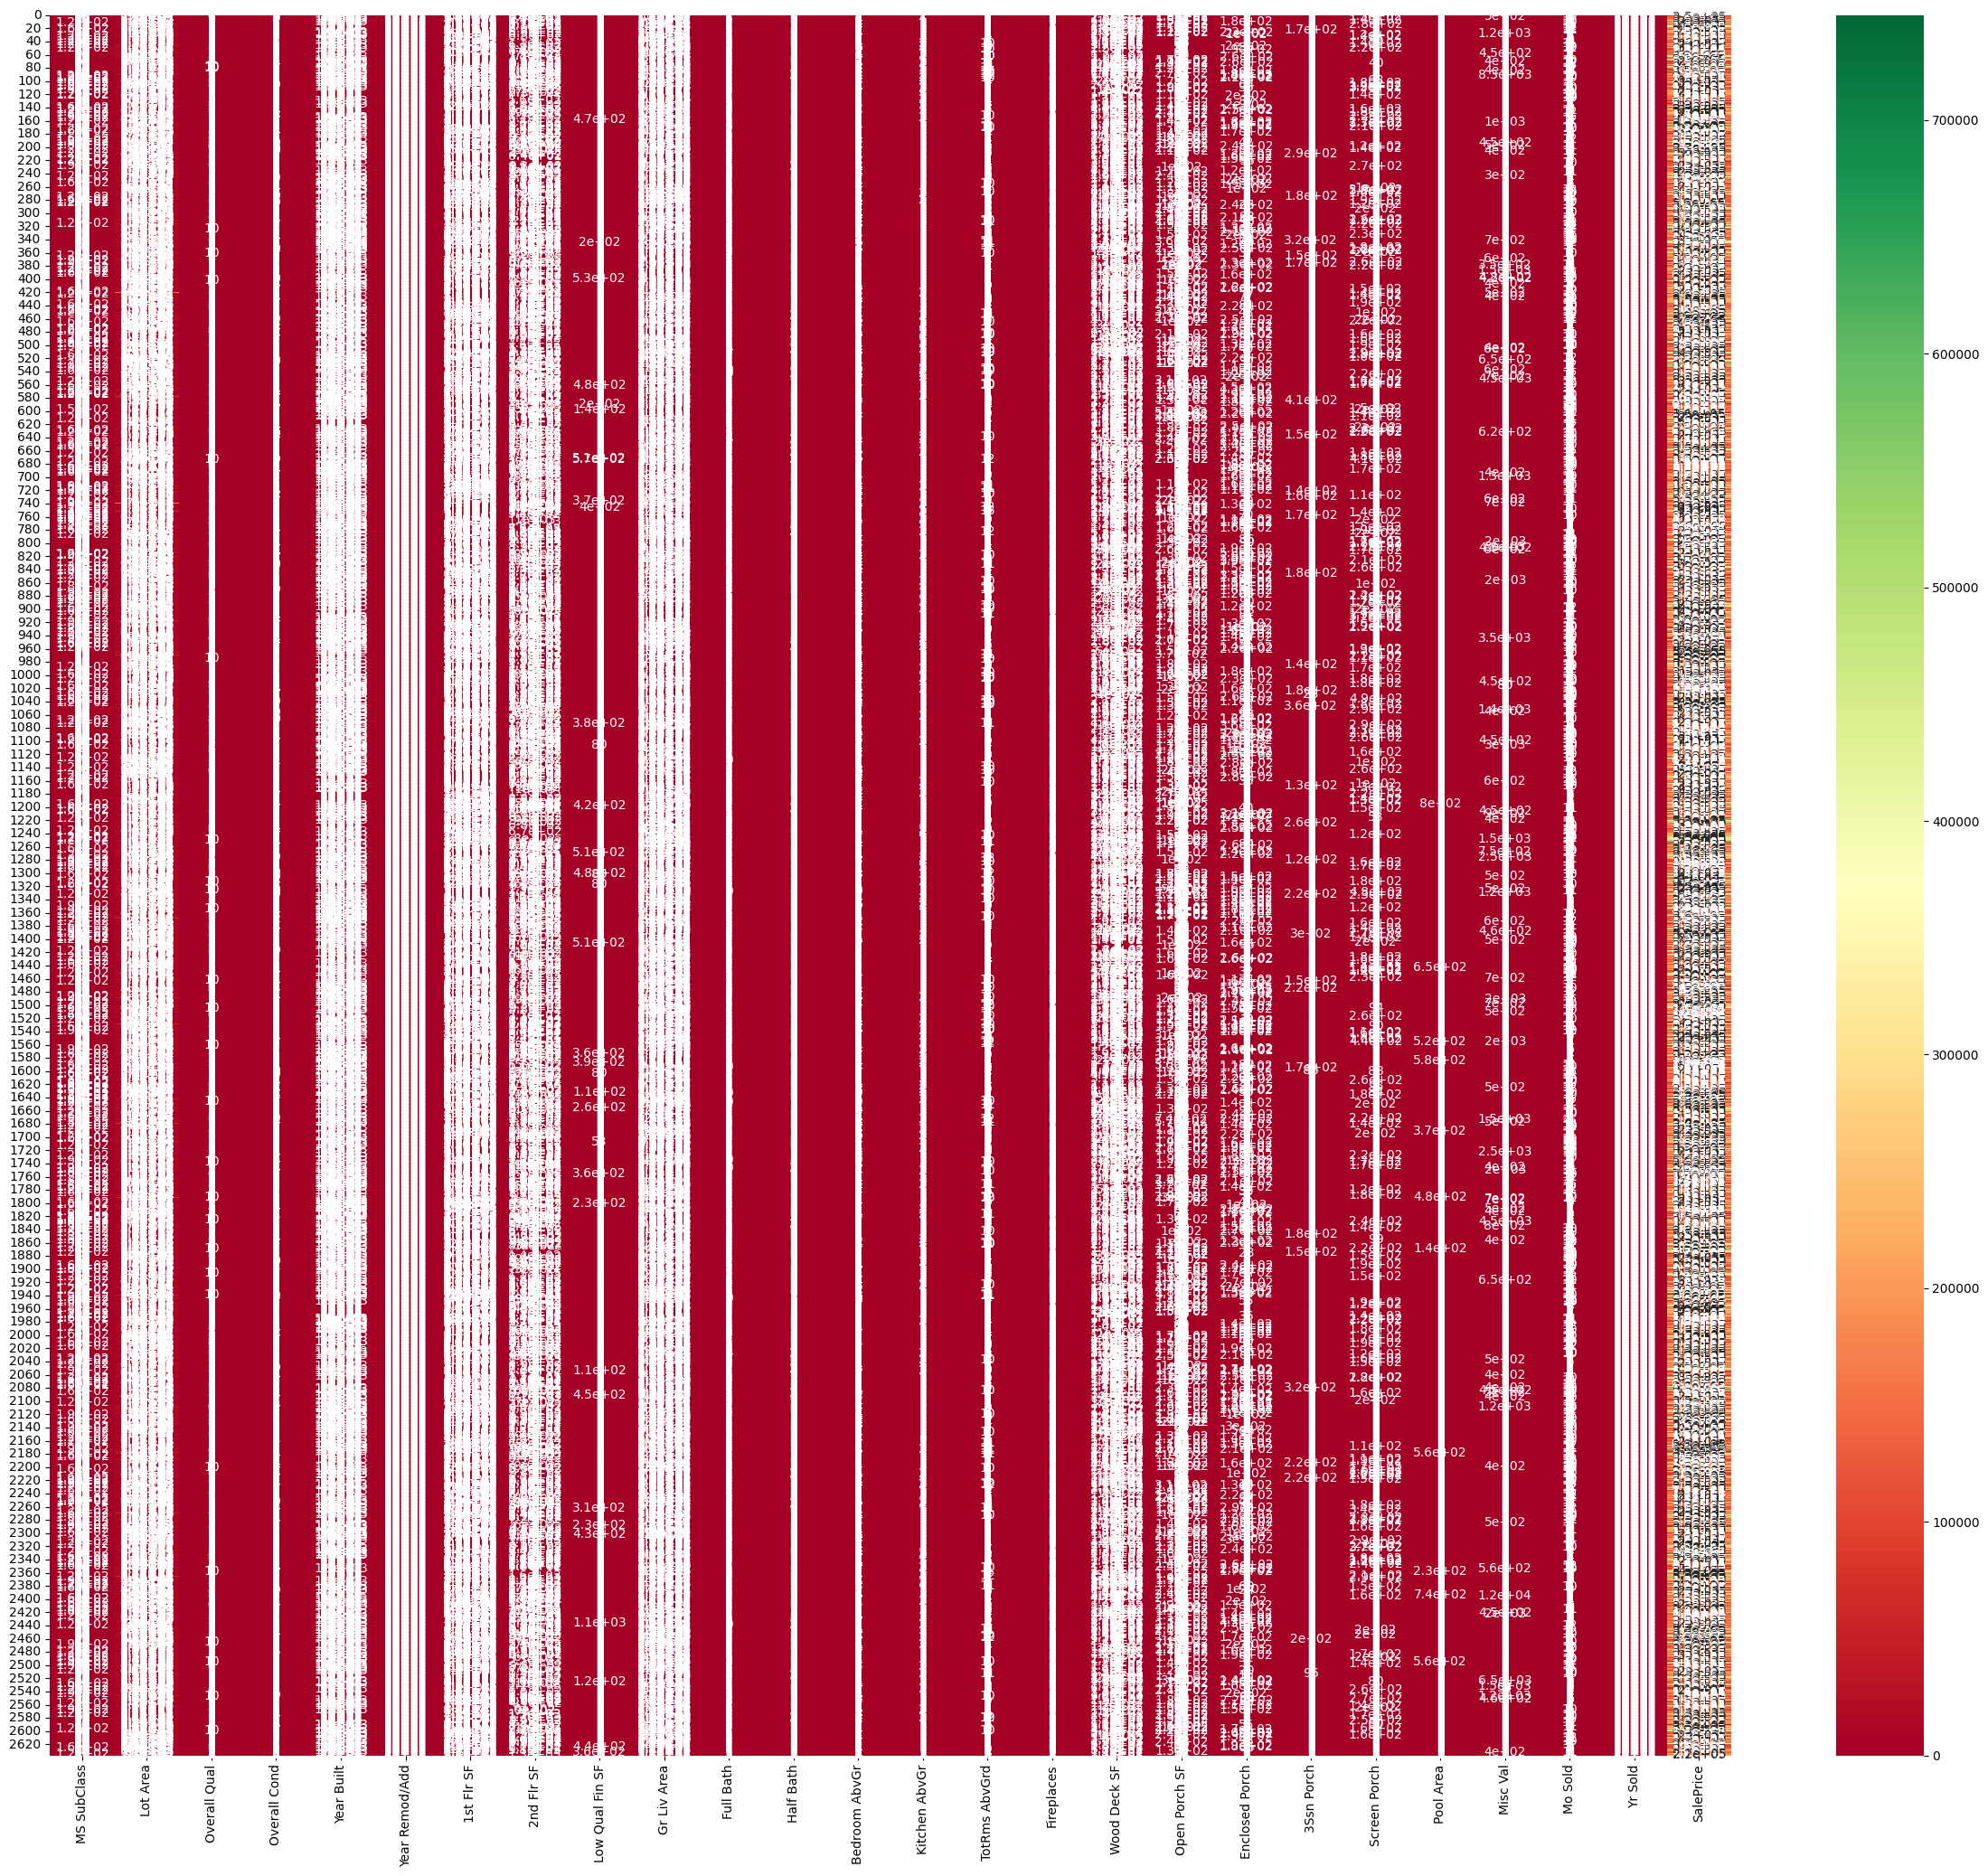

In [56]:
#copy data frame with only integer values for a correlation plot
#df.corr()
column_int = df.select_dtypes(include=['int64'])
column_int.corr()
plt.figure(figsize=(30,25))
sns.heatmap(column_int, annot=True, cmap='RdYlGn') ;
plt.savefig('df-heat.png')
#, cmap='RdYlGn'

Too much detail to visually make sense of it

In [ ]:
sns.pairplot(df)
plt.savefig('pairplot.png')

Too much detail to visually make sense of it. So I printed it, crossed out variables that had no strong meaning and highlighted those with strong relationship. The following were identified:

## Data Processing

Regression analysis using Statsmodel

In [26]:
# break data into training and testing sets
#X = df[['Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area']]
X= df.drop(columns=['SalePrice'])
# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True) # drop_first avoids multicollinearity
# Force all columns to numeric, replacing non-convertible values with NaN
X = X.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0 (or another appropriate strategy)
X = X.fillna(0)
X2 = sm.add_constant(X) # add constant so that intercept is estimated
print(X2.head())
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=4)

   const  MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0    1.0           20     14299             4             3        1964   
1    1.0           90     10791             4             5        1967   
2    1.0           50      9000             6             6        1937   
3    1.0           60      7379             8             5        2000   
4    1.0           70      7200             7             9        1936   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  ...  \
0            1964           0.0         513.0         144.0  ...   
1            1967           0.0           0.0           0.0  ...   
2            1950           0.0           0.0           0.0  ...   
3            2000           0.0         484.0           0.0  ...   
4            2007           0.0         350.0         210.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1     

In [32]:
# Fit a linear model using statsmodels
def fit_linear_model(endog, exog):
  if endog.dtype == object or exog is not None and exog.dtype == object:
      raise ValueError("Pandas data cast to numpy dtype of object. "
                      "Check input data with np.asarray(data).")
  else:
      myfit = sm.OLS(y_train, X_train).fit()
      myfit.summary()


## Data Visualization

## Conclusion

A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .
